In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and exploring the dataset

In [6]:
item_data = pd.read_csv('item.csv')
supermarkets_data = pd.read_csv('supermarkets.csv')
sales_data = pd.read_csv('sales.csv')
promotion_data = pd.read_csv('promotion.csv')

In [7]:
item_data.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [10]:
supermarkets_data.head()

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


In [12]:
sales_data.tail()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
1048570,1510000011,2.35,1,1307,2,27,43825,346,665448,189,0
1048571,3620000489,0.99,1,1307,2,27,43825,346,665448,189,0
1048572,9999971309,2.00,2,1410,2,27,42140,346,665449,189,0
1048573,3620000250,1.98,2,1415,2,27,53544,346,665450,189,0
1048574,3620000350,1.98,2,1415,2,27,53544,346,665450,189,0


In [14]:
promotion_data.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [16]:
item_data.shape

(927, 5)

In [18]:
supermarkets_data.shape

(387, 2)

In [20]:
sales_data.shape

(1048575, 11)

In [22]:
promotion_data.shape

(351372, 6)

#### Checking for null values

In [25]:
item_data.isnull().sum()

code          0
descrption    0
type          0
brand         0
size          0
dtype: int64

In [27]:
supermarkets_data.isnull().sum()

supermarket_No    0
postal-code       0
dtype: int64

In [29]:
sales_data.isnull().sum()

code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64

In [31]:
promotion_data.isnull().sum()

code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64

#### Checking for duplicate values

In [34]:
item_data.duplicated().any()

False

In [36]:
supermarkets_data.duplicated().any()

False

In [38]:
sales_data.duplicated().any()

False

In [40]:
promotion_data.duplicated().any()

False

In [42]:
item_data.dtypes

code           int64
descrption    object
type          object
brand         object
size          object
dtype: object

In [44]:
supermarkets_data.dtypes

supermarket_No    int64
postal-code       int64
dtype: object

In [46]:
sales_data.dtypes

code             int64
amount         float64
units            int64
time             int64
province         int64
week             int64
customerId       int64
supermarket      int64
basket           int64
day              int64
voucher          int64
dtype: object

In [48]:
promotion_data.dtypes

code             int64
supermarkets     int64
week             int64
feature         object
display         object
province         int64
dtype: object

# EDA

In [50]:
sales_data.describe()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.067646e+09,1.780470e+00,1.188219e+00,1.543165e+03,1.441374e+00,1.347071e+01,2.003481e+05,1.980431e+02,3.333491e+05,9.119343e+01,2.356245e-02
std,3.154184e+09,5.966503e+00,5.466197e-01,3.833751e+02,4.965514e-01,8.549682e+00,1.247446e+05,1.122828e+02,1.917741e+05,5.983773e+01,1.516815e-01
min,1.111124e+08,-8.280000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.259000e+03,1.000000e+00,6.000000e+00,9.211700e+04,1.010000e+02,1.681505e+05,3.900000e+01,0.000000e+00
50%,5.100003e+09,1.500000e+00,1.000000e+00,1.601000e+03,1.000000e+00,1.200000e+01,1.905030e+05,2.000000e+02,3.318470e+05,8.300000e+01,0.000000e+00
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.824000e+03,2.000000e+00,2.300000e+01,3.039840e+05,2.950000e+02,5.000225e+05,1.570000e+02,0.000000e+00
max,9.999986e+09,5.900000e+03,1.000000e+02,2.359000e+03,2.000000e+00,2.800000e+01,5.100270e+05,3.850000e+02,6.654500e+05,1.950000e+02,1.000000e+00


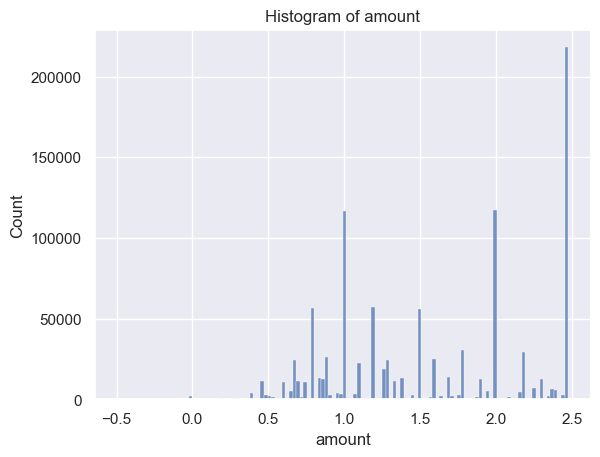

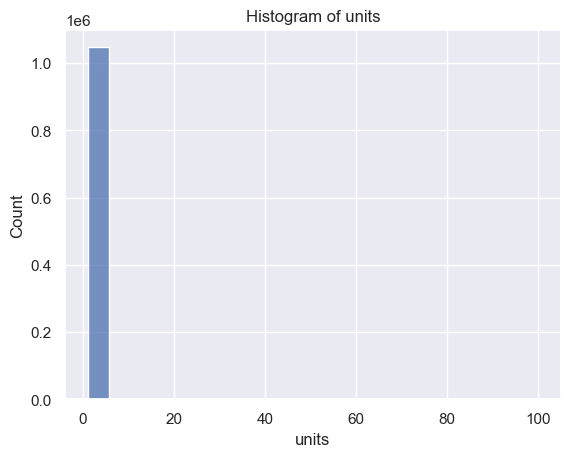

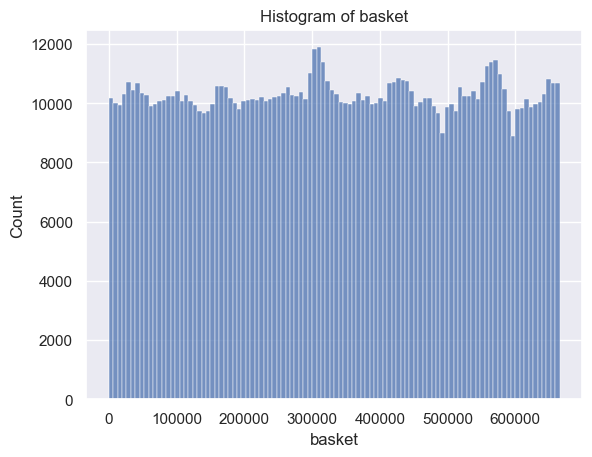

In [188]:
columns_to_check = ['amount', 'units', 'basket']
for i in columns_to_check:
    sns.histplot(sales_data[i])
    plt.title(f'Histogram of {i}')
    plt.show()
    

### Handling Outliers

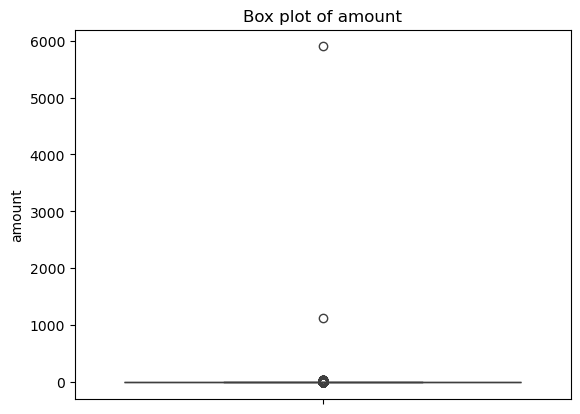

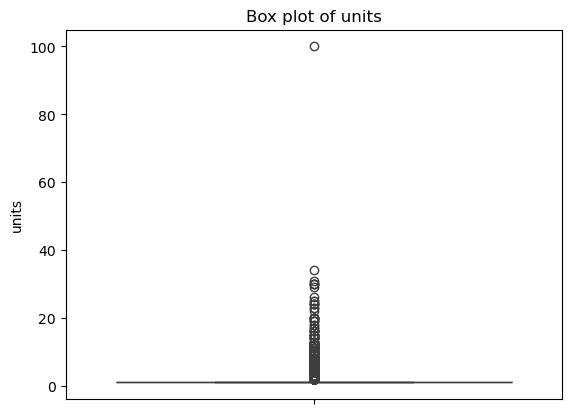

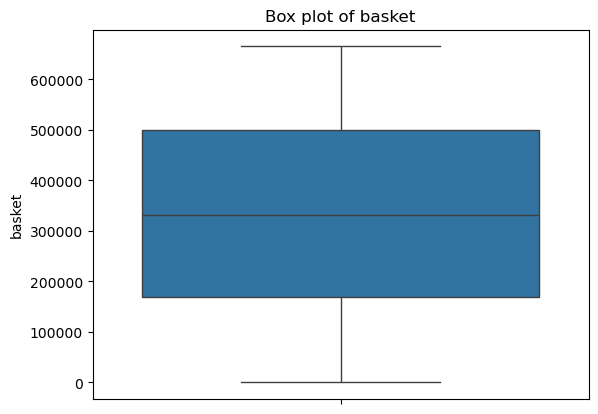

In [59]:
columns_to_check_outliers = ['amount', 'units', 'basket']
for i in columns_to_check_outliers:
    sns.boxplot(sales_data[i])
    plt.title(f'Box plot of {i}')
    plt.show()

In [61]:
q1 = sales_data['amount'].quantile(0.25)
q3 = sales_data['amount'].quantile(0.75)
iqr = q3 = q1
iqr, q3, q1

(0.99, 0.99, 0.99)

In [63]:
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

upper_limit, lower_limit

(2.4749999999999996, -0.4949999999999999)

In [65]:
#capping the outliers
sales_data.loc[(sales_data['amount'] > upper_limit), 'amount'] = upper_limit
sales_data.loc[(sales_data['amount'] < lower_limit), 'amount'] = lower_limit


<Axes: ylabel='amount'>

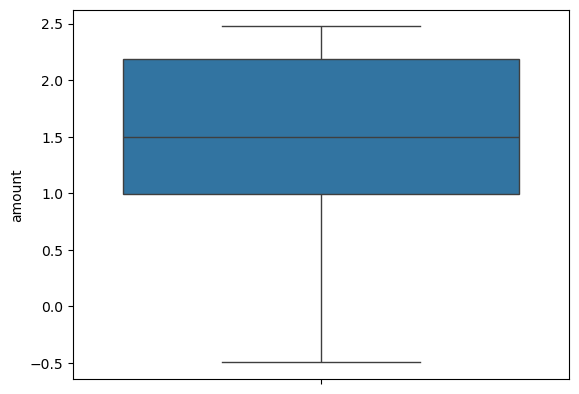

In [108]:
# display amount column after cap the outliers
sns.boxplot(sales_data['amount'])

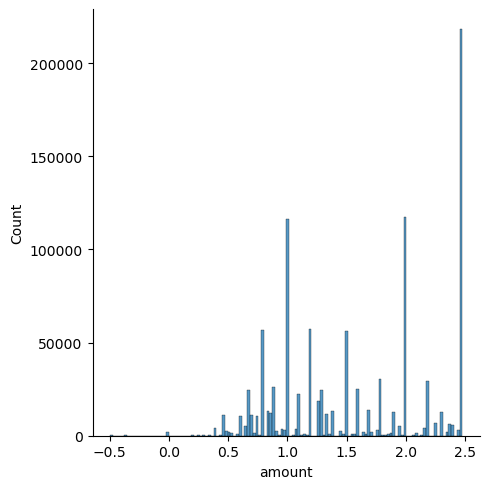

In [75]:
sns.displot(sales_data['amount'])

# Predictive Modeling
implement a machine learning model to predict future sales based on historical data.

### Feature Selection

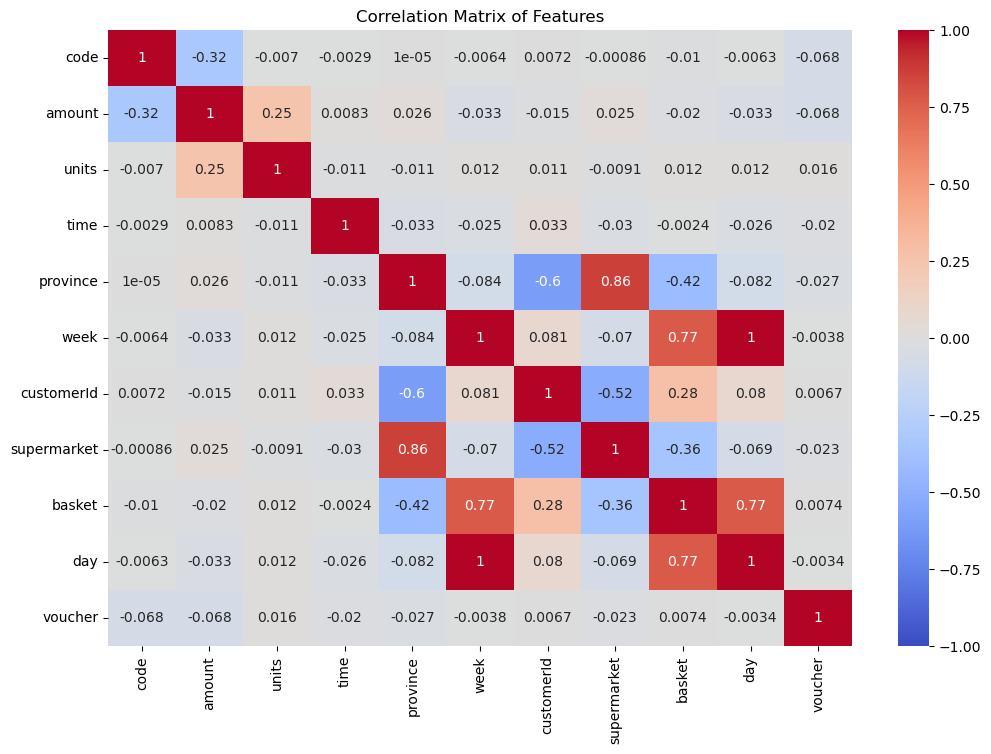

In [82]:
correlation_matrix = sales_data.corr()

# Plot heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [178]:
X = sales_data.drop('amount', axis=1)
y = sales_data['amount']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
def correlation(dataset, threshold):
    corr_col = set()
    corr_matrx = dataset.corr()
    for i in range(len(corr_matrx.columns)):
        for j in range(i):
            if corr_matrx.iloc[i, j] > threshold:
                col_name = corr_matrx.columns[i]
                corr_col.add(col_name)

    return corr_col

In [92]:
corr_features = correlation(X_train, 0.8)
corr_features

{'day', 'supermarket'}

In [94]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [96]:
X_train.dtypes

code          int64
units         int64
time          int64
province      int64
week          int64
customerId    int64
basket        int64
voucher       int64
dtype: object

### Model Selection & Performance Evaluation

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression - R2: 0.18, MAE: 0.51, RMSE: 0.59
Random Forest - R2: 0.78, MAE: 0.17, RMSE: 0.31
XGBoost - R2: 0.75, MAE: 0.23, RMSE: 0.33
                         R2       MAE      RMSE
Linear Regression  0.180405  0.510604  0.593136
Random Forest      0.776018  0.173425  0.310071
XGBoost            0.749675  0.227513  0.327799


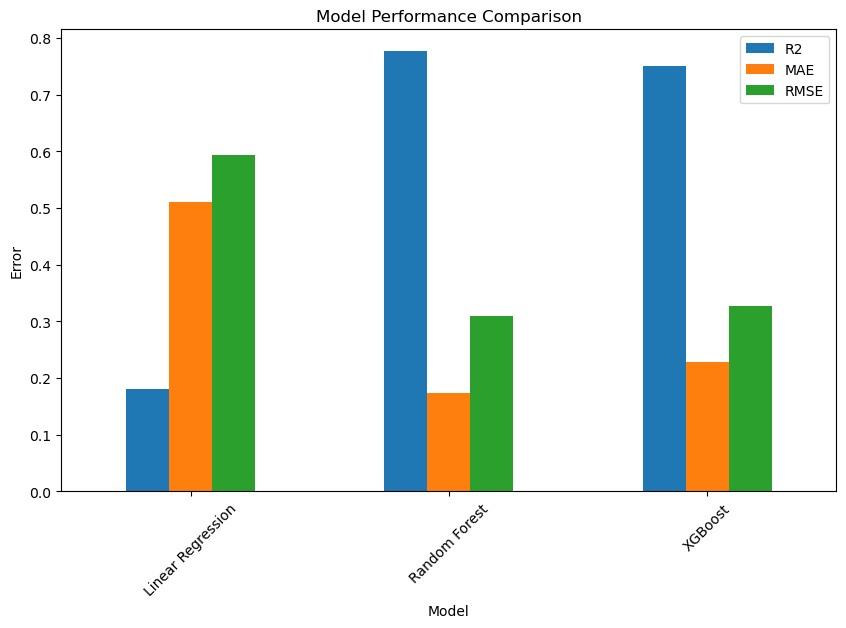

In [107]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[model_name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse}
    
    # Print results
    print(f"{model_name} - R2: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Optional: Plot the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Selected model --> Random Forest

In [111]:
sales_data.tail(1)

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
1048574,3620000350,1.98,2,1415,2,27,53544,346,665450,189,0


In [113]:
X_train.head(1)

,code,units,time,province,week,customerId,basket,voucher
408561,3620001397,1,2242,1,7,357124,262093,1


In [115]:
input = (3620000350, 2, 1415, 2, 27, 53544, 665450, 0 )
new_input = np.asanyarray(input, dtype=float)
prediction = models['Random Forest'].predict(new_input.reshape(1, -1))
print(prediction)

[1.98]


C:\Users\AnnaBelle\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Sales Trend Analysis
Analyze sales trends over time

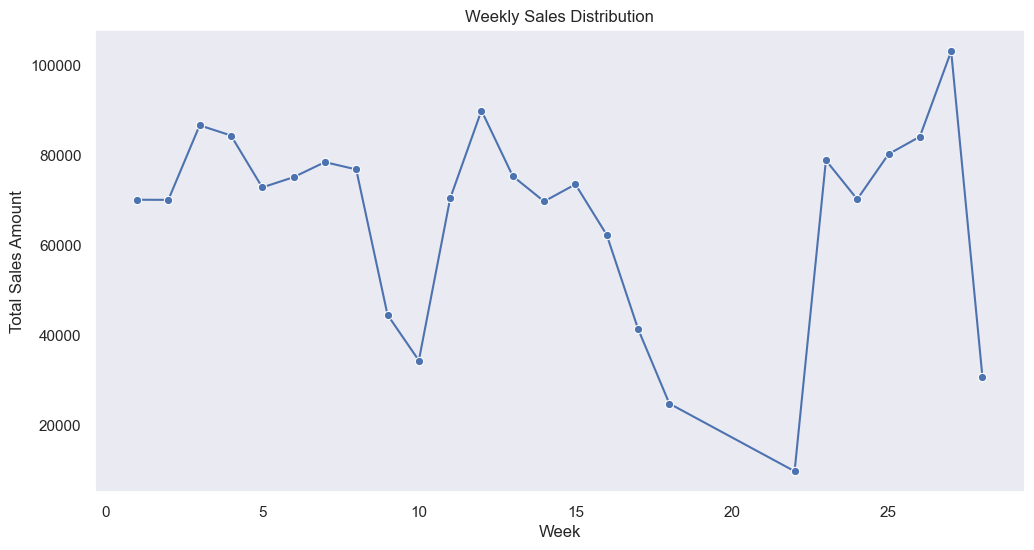

In [201]:
#calculate the total sales amount for each week
weekly_sales = sales_data.groupby('week')['amount'].sum().reset_index()

# Plotting the weekly sales distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='week', y='amount', marker='o')
plt.title('Weekly Sales Distribution')
plt.xlabel('Week')
plt.ylabel('Total Sales Amount')
plt.grid()
plt.show()